# **Prediction using Decision Tree Algoritm**
--------------------------------------------------------------------------------

**Importing Libraries**

In [1]:
import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image  
import pydotplus

**Loading Dataset**

In [2]:
iris_data = datasets.load_iris()

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

df['target'] = iris_data.target


In [3]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
print(df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
target = iris_data.target
print(target)
print("\n"*2)

unique = df['target'].unique()
print(unique)
print("\n"*2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



[0 1 2]





In [7]:
null_check = df.isnull().sum()
print(null_check)
print("\nthere are no null values and thus, there's no need to process it.")
print("\n"*2)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

there are no null values and thus, there's no need to process it.





**Visualizing the Dataframe**

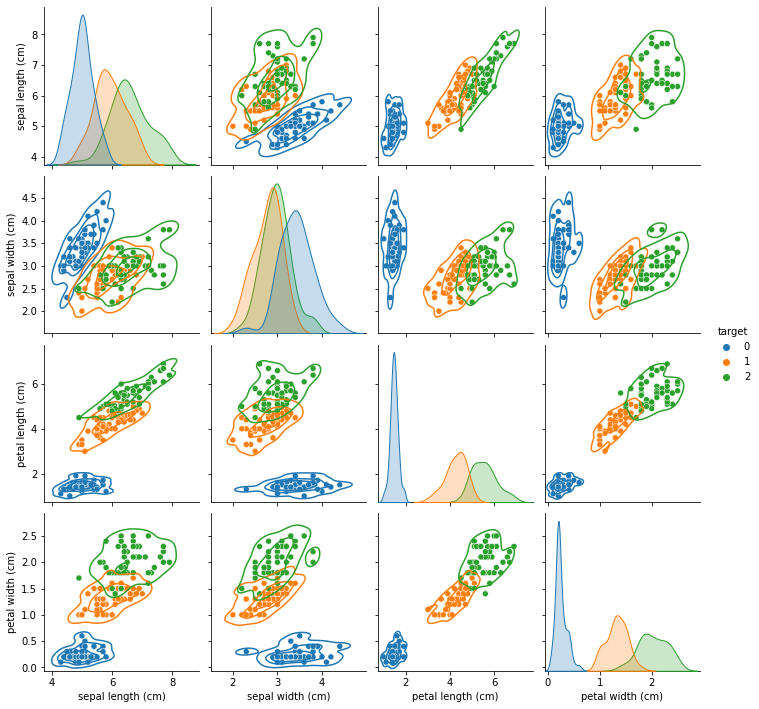

In [8]:
plot_var_1 = sns.pairplot(df, kind = 'scatter', diag_kind='kde', hue = 'target', palette=["C0", "C1", "C2"])
plot_var_2 = plot_var_1.map_lower(sns.kdeplot, levels=4)
plot_1 = plot_var_2.map_upper(sns.kdeplot, levels=4)
print(plot_1)
print("\n"*2)

**Visualizing the distribution of target values via Pie Chart**

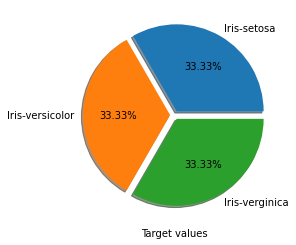

In [9]:
temp_var_1 = df['target'].value_counts()
plt.pie(temp_var_1.values, labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-verginica'], explode = (0.05,0.05,0.05), autopct='%1.2f%%', shadow=True)
plt.xlabel('Target values')
plt.show()

**Visualizing the Correlation among features**

AxesSubplot(0.125,0.125;0.62x0.755)


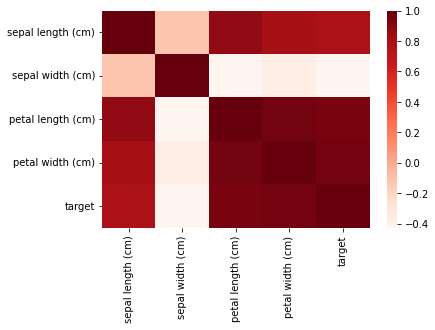

In [10]:
plot_2 = sns.heatmap(df.corr(method='pearson'), cmap='Reds')
print(plot_2)

**Preparing data for Training and Testing.**

Getting the X and Y dataset ready.

In [11]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y = df[['target']]
print("The X dataset\n")
print(X)
print("\n"*2)
print("The Y dataset\n")
print(Y)

The X dataset

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]



The Y dataset

     ta


**Splitting the Datasets into 80:20 ratio for Train and Test set bold text**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)

print("The X training dataset \n")
print(X_train)
print("\n"*2)
print("The X test dataset \n")
print(X_test)
print("\n"*2)
print("The Y train dataset \n")
print(Y_train)
print("\n"*2)
print("The Y test dataset \n")
print(Y_test)
print("\n"*2)

print("Dataset sizes \n")
print('X Training data size  : ',X_train.size, "values")
print('X Test data size      : ',X_test.size, "values")
print('Y Training data size  : ',Y_train.size, "values")
print('Y Test data size      : ',Y_test.size, "values")

The X training dataset 

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
12                 4.8               3.0                1.4               0.1
125                7.2               3.2                6.0               1.8
62                 6.0               2.2                4.0               1.0
120                6.9               3.2                5.7               2.3
104                6.5               3.0                5.8               2.2
..                 ...               ...                ...               ...
81                 5.5               2.4                3.7               1.0
83                 6.0               2.7                5.1               1.6
138                6.0               3.0                4.8               1.8
25                 5.0               3.0                1.6               0.2
139                6.9               3.1                5.4               2.1

[120 rows x 4 columns]



The X test d

**Predicting and Evaluating the Model**

In [13]:
dt_model = DecisionTreeClassifier(max_depth = 10, random_state = 2)
dt_model.fit(X_train,Y_train)

print("Decision Tree created !")

Y_pred = dt_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test,Y_pred)

print("Confusion Matrix\n")
print(conf_matrix)
print("\n"*2)
print("Classification Report\n")
print(class_report)
print("\n"*2)

Decision Tree created !
Confusion Matrix

[[ 7  0  0]
 [ 0 12  2]
 [ 0  1  8]]



Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      0.86      0.89        14
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.91        30
weighted avg       0.90      0.90      0.90        30






In [14]:
accuracy = dt_model.score(X_test,Y_test)

print("Model Score\n")
print(accuracy)
print()
print("This signifies that the model's accuracy is :", (str(format(accuracy*100, '.2f')) + "%"), "!")

Model Score

0.9

This signifies that the model's accuracy is : 90.00% !


**Visualizing the Decision Tree Model**

Visualizing Graphically

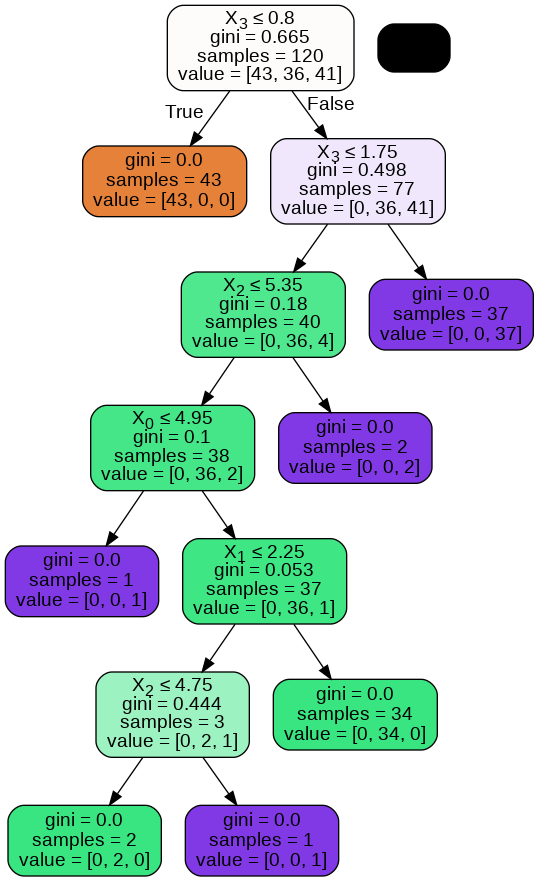

In [15]:
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data, filled = True, rotate = False, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Visualizing Textually

In [16]:
text_visual = export_text(dt_model,feature_names=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'))
print(text_visual)

|--- PetalWidthCm <= 0.80
|   |--- class: 0
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 5.35
|   |   |   |--- SepalLengthCm <= 4.95
|   |   |   |   |--- class: 2
|   |   |   |--- SepalLengthCm >  4.95
|   |   |   |   |--- SepalWidthCm <= 2.25
|   |   |   |   |   |--- PetalLengthCm <= 4.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PetalLengthCm >  4.75
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- SepalWidthCm >  2.25
|   |   |   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  5.35
|   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- class: 2



The Aim of this task is to predict iris species, while portraying the model created visually by using decision tree classifier / algorithm.